In [1]:
from scipy.io import netcdf
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
from netCDF4 import Dataset, date2index
import matplotlib.pyplot as plt
import sys
import matplotlib as mpl
import numpy.ma as ma
import numpy as np
from mpl_toolkits.basemap import maskoceans
from mpl_toolkits.basemap import interp
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
plt.style.use('ggplot')
SIZE = 58
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

In [3]:
surf = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc','r')
params = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/clm5_params.c200614.nc','r')
f = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/ELM_FUN.clm2.h0.185001-201012.nc','r')

In [4]:
f['lat'][:]

masked_array(data=[-90.        , -88.10526   , -86.210526  , -84.31579   ,
                   -82.42105   , -80.52631   , -78.63158   , -76.73684   ,
                   -74.8421    , -72.947365  , -71.052635  , -69.1579    ,
                   -67.26316   , -65.36842   , -63.473682  , -61.57895   ,
                   -59.68421   , -57.789474  , -55.894737  , -54.        ,
                   -52.105263  , -50.210526  , -48.31579   , -46.42105   ,
                   -44.526318  , -42.63158   , -40.736843  , -38.842106  ,
                   -36.94737   , -35.05263   , -33.157894  , -31.263159  ,
                   -29.368422  , -27.473684  , -25.578947  , -23.68421   ,
                   -21.789474  , -19.894737  , -18.        , -16.105263  ,
                   -14.210526  , -12.315789  , -10.421053  ,  -8.526316  ,
                    -6.631579  ,  -4.736842  ,  -2.8421052 ,  -0.94736844,
                     0.94736844,   2.8421052 ,   4.736842  ,   6.631579  ,
                     8.52

In [5]:
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]

perecm = params.variables['akc_active'][:]

pft_map_nat = surf.variables['PCT_NAT_PFT'][:]
pft_map_crop = surf.variables['PCT_CFT'][:]

pct_natveg = surf.variables['PCT_NATVEG'][:]
pct_crop = surf.variables['PCT_CROP'][:]

#Declaring empty matrix
perecm_map_nat = np.zeros((96,144))

perecm_map_crop = np.zeros((96,144))

perecm_map_tot = np.zeros((96,144))


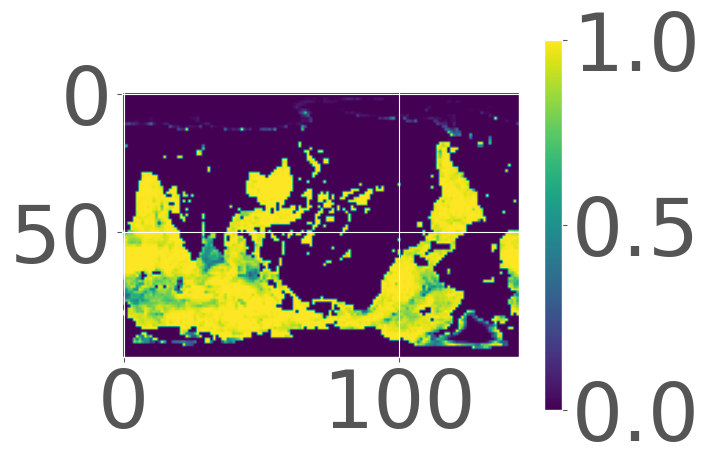

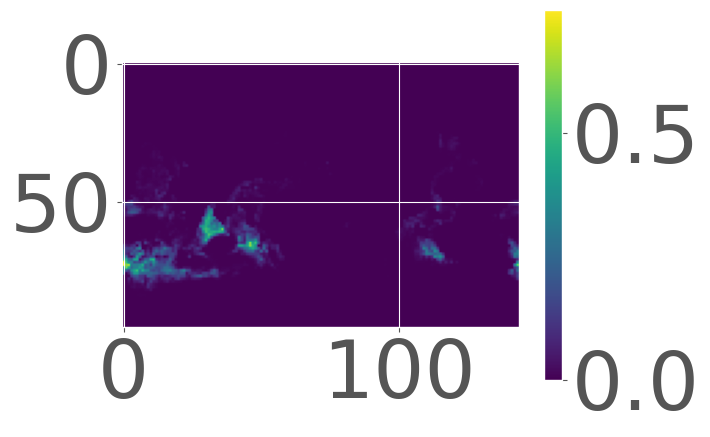

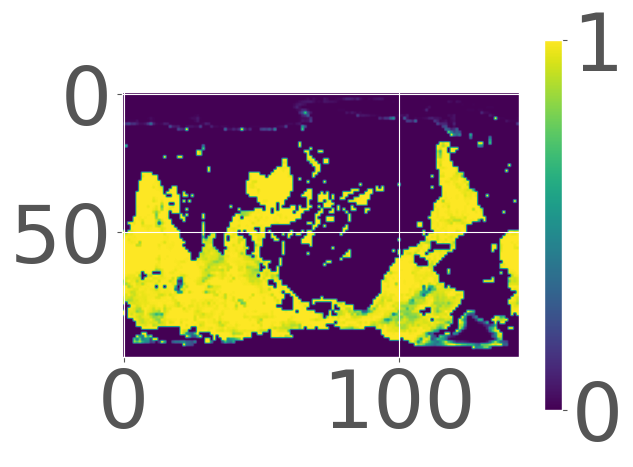

In [6]:
plt.imshow(pct_natveg[:,:]/100.)
plt.colorbar()
plt.show()

plt.imshow((pct_crop[:,:])/100.)
plt.colorbar()
plt.show()

plt.imshow((pct_crop[:,:]+pct_natveg[:,:])/100.)
plt.colorbar()
plt.show()

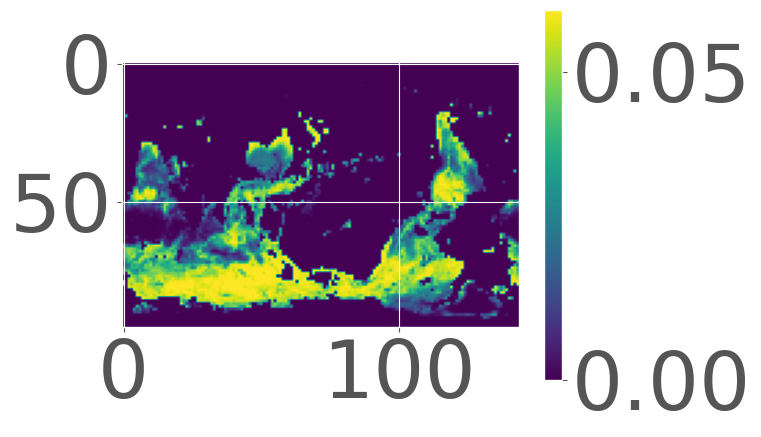

In [7]:
perecm_map_nat = np.zeros((96,144))
for i in range(0,14):
    #print(i,perecm[i],perecm_new[i])
    perecm_map_nat = perecm_map_nat + perecm[i]*(pft_map_nat[i,:,:]/100.)*(pct_natveg[:,:]/100.)
    #perecm_map_nat = perecm_map_nat + perecm[i]*(pft_map_nat[i,:,:]/100.)

    
#perecm_map_nat = ma.array(perecm_map_nat,mask=[pft_map_nat[0,:,:]>99.])

plt.imshow(perecm_map_nat)
plt.colorbar()
plt.show()



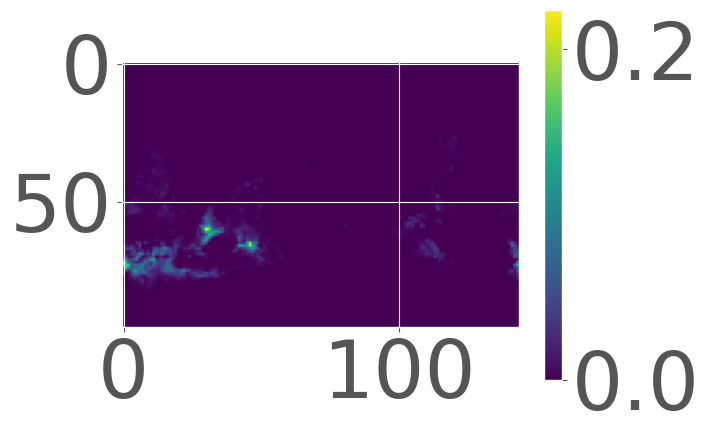

In [8]:
perecm_map_crop =  np.zeros((96,144))
for i in range(64):
    #print(i+14,perecm[i+14],perecm_new[i+14])
    perecm_map_crop = perecm_map_crop + (perecm[i+14]*pft_map_crop[i,:,:]/100.)*(pct_crop[:,:]/100.)
    #perecm_map_crop = perecm_map_crop + (perecm[i+14]*pft_map_crop[i,:,:]/100.)
    
#perecm_map_crop = ma.array(perecm_map_crop,mask=[pft_map_crop[0,:,:]>99.])

plt.imshow(perecm_map_crop)
plt.colorbar()
plt.show()


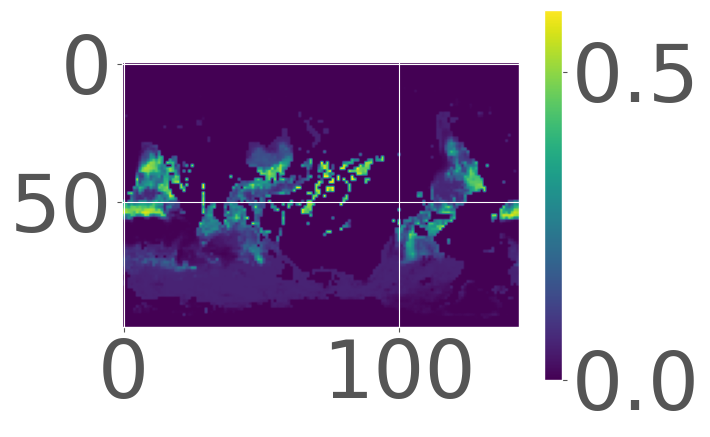

In [9]:
perecm_map_tot =  np.zeros((96,144))   
for i in range(0,78):
    #print(i,perecm[i],perecm_new[i])
    if i < 15:
        #print(i,'nat')
        perecm_map_tot = perecm_map_tot + perecm[i]*(pft_map_nat[i,:,:]/100.)*(pct_natveg[:,:]/100.)
    if 14 < i and i < 64:
        #print(i,'crop')
        perecm_map_tot = perecm_map_tot + perecm[i]*(pft_map_crop[i-15,:,:]/100.)*(pct_crop[:,:]/100.)
        
#perecm_map_tot = ma.array(perecm_map_tot,mask=[pft_map_nat[0,:,:]>90.])

plt.imshow(perecm_map_tot)
plt.colorbar()
plt.show()
#sys.exit()

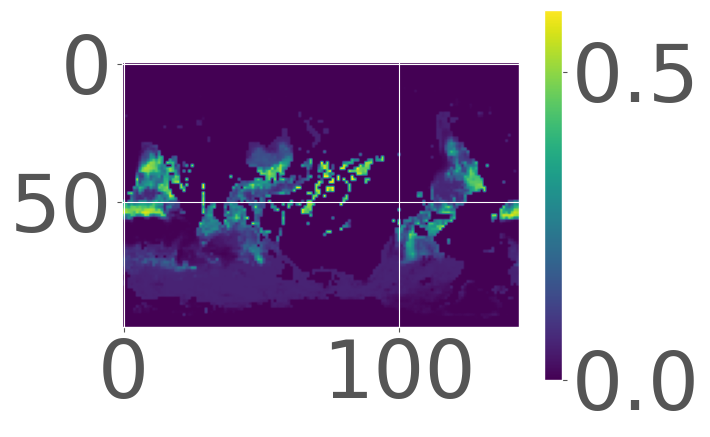

In [10]:
plt.imshow((perecm_map_tot))
plt.colorbar()
plt.show()
#sys.exit()

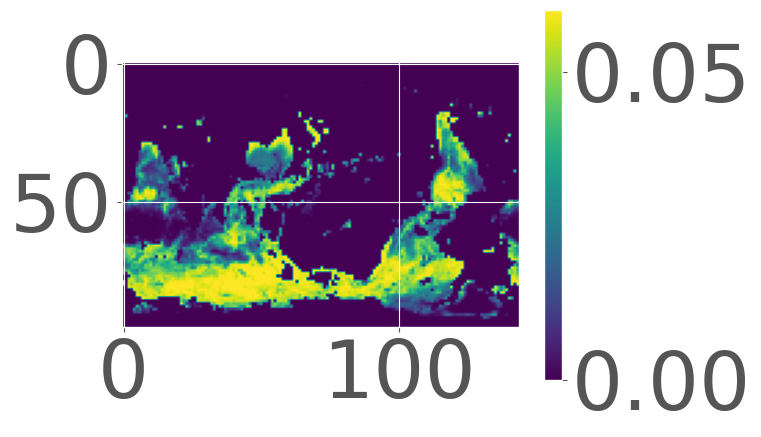

In [11]:
plt.imshow((perecm_map_nat))
plt.colorbar()
plt.show()

In [12]:
#ONLY NATURAL VEGETATION
perecm_map_tot = perecm_map_nat + perecm_map_crop


#print lat,lon,clump

perecm_map_nat,lon = shiftgrid(180., perecm_map_nat, lon, start=False)


lon = f.variables['lon'][:]
perecm_map_tot,lon = shiftgrid(180., perecm_map_tot, lon, start=False)

lon = f.variables['lon'][:]
perecm_map_crop,lon = shiftgrid(180., perecm_map_crop, lon, start=False)


m = Basemap(projection='robin', lon_0=0.,resolution='l')

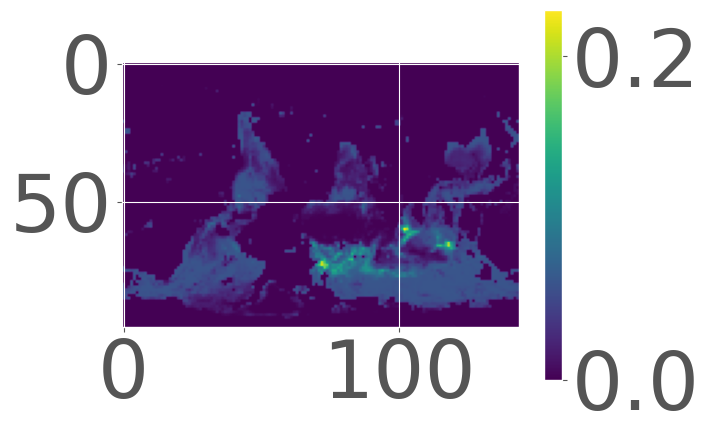

In [13]:
x,y = np.meshgrid(lon, lat) 
X,Y = m(x, y)

#print(lon,lat)
#print(len(lon),len(lat))

#perecm_map_tot_new -> Steidinger
#perecm_map_tot -> Shi 

v0 = perecm_map_tot[:,:]

all_change = [v0]

plt.imshow(v0)
plt.colorbar()
plt.show()

v = np.mean(np.array([v0]),axis = 0)
vstd = np.std(np.array([v0]),axis = 0)


#lon = f.variables['lon'][:]
#pft_map_nat,lon = shiftgrid(180., pft_map_nat, lon, start=False)


In [14]:
count = 0 

for index in all_change:
    #PLOT all
    agree_matrix = np.zeros((96,144))

    for i in range(96):
        for j in range(144):
            agree_matrix[i,j] = index[i,j]




    x2 = np.linspace(x[0][0],x[0][-1],x.shape[1]*40)
    y2 = np.linspace(y[0][0],y[-1][0],y.shape[0]*60)


    x2,y2 = np.meshgrid(x2,y2)
    X2,Y2 = m(x2, y2)


    #data2 = interp(agree_matrix,x[0],y[:,0],x2,y2,order=1)
    data1 = interp(v0,x[0],y[:,0],x2,y2,order=1)

    

    print(np.shape(data1))

    mdata = maskoceans(x2, y2, data1,resolution='h',grid=1.25,inlands=True)



    fig = plt.figure(figsize=(48, 48)) 
    m.drawmapboundary(fill_color='white', zorder=-1)
    m.fillcontinents(color='0.8', lake_color='white', zorder=0) 
    m.drawcoastlines(color='0.6', linewidth=0.5)
    m.drawcountries(color='0.6', linewidth=0.5)
    m.drawparallels(np.arange(-90.,91.,30.), labels=[1,0,0,1],    dashes=[1,1], linewidth=0.25, color='0.5',fontsize='large')
    m.drawmeridians(np.arange(0., 360., 60.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize='large')

    #PLOT CHANGE
    #vmin,vmax = (-100,100)
    vmin,vmax = (np.min(v0),np.max(v0))
    vmin,vmax = (np.min(v0),0.4)


    
    levels = np.linspace(vmin,vmax,26)   
    cs = m.contourf(X2,Y2,mdata,levels,vmin=vmin,vmax=vmax,cmap=plt.cm.viridis,extend='both')
   
    plt.tight_layout()
    cbar = m.colorbar(cs,location='bottom',pad='10%',ticks=np.linspace(vmin,vmax,7),format='%.2f')
    cbar.ax.get_xaxis().labelpad = 60
    cbar.ax.set_xlabel(r'AM Kc (g.m$^{-3}$)', rotation=0,color='black', size=94)
    cbar.solids.set_edgecolor("face")
    #cbar.set_clim(vmin,vmax)
    # Assuming cbar is your Colorbar object
    #cbar.ax.set_clim(vmin, vmax)
    cbar.ax.tick_params(labelsize='xx-large')
    plt.savefig('akc_clm.png',bbox_inches="tight",dpi=300)
    count = count + 1
    print('Saved Figure diff_v%s_v2.png!' % str(count)) 
    plt.close("all")



(5760, 5760)
Saved Figure diff_v1_v2.png!


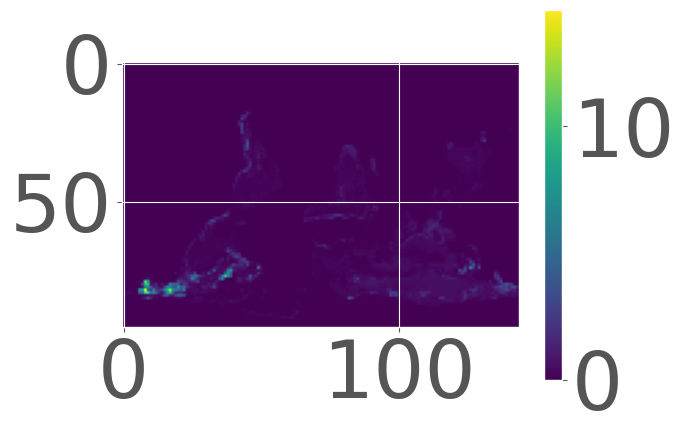

In [15]:
#akc_igbp = Dataset('/Users/braghier/Documents/Working_papers/FUN_cost_parameters/k_params/output_b_map_144x96.nc','r')
akc_igbp = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/k_params/kc_am_soilgrids_0-100cm_144x96.nc','r')

#print(akc_igbp)

lat_igbp = akc_igbp.variables['lat'][:]
lon_igbp = akc_igbp.variables['lon'][:]
v1 = akc_igbp.variables['Band1'][:]

#v1,lon = shiftgrid(180., v1, lon_igbp, start=False)

v1,lon_igbp = shiftgrid(180., v1, lon_igbp, start=False)

x1,y1 = np.meshgrid(lon_igbp, lat_igbp) 
X1,Y1 = m(x1, y1)


plt.imshow(v1)
plt.colorbar()

In [16]:




x2 = np.linspace(x1[0][0],x1[0][-1],x1.shape[1]*40)
y2 = np.linspace(y1[0][0],y1[-1][0],y1.shape[0]*60)


x2,y2 = np.meshgrid(x2,y2)
X2,Y2 = m(x2, y2)


#data2 = interp(agree_matrix,x[0],y[:,0],x2,y2,order=1)
data2 = interp(v1,x1[0],y1[:,0],x2,y2,order=1)

print(np.shape(data2))

mdata1 = maskoceans(x2, y2, data2,resolution='h',grid=1.25,inlands=True)

fig = plt.figure(figsize=(48, 48)) 
m.drawmapboundary(fill_color='white', zorder=-1)
m.fillcontinents(color='0.8', lake_color='white', zorder=0) 
m.drawcoastlines(color='0.6', linewidth=0.5)
m.drawcountries(color='0.6', linewidth=0.5)
m.drawparallels(np.arange(-90.,91.,30.), labels=[1,0,0,1],    dashes=[1,1], linewidth=0.25, color='0.5',fontsize='large')
m.drawmeridians(np.arange(0., 360., 60.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize='large')


vmin,vmax = (np.min(v1),np.max(v1))
vmin,vmax = (np.min(v1),1.25)


    
levels = np.linspace(vmin,vmax,26)   
cs = m.contourf(X2,Y2,mdata1,levels,vmin=vmin,vmax=vmax,cmap=plt.cm.viridis,extend='both')
   
plt.tight_layout()
cbar = m.colorbar(cs,location='bottom',pad='10%',ticks=np.linspace(vmin,vmax,7),format='%.2f')
cbar.ax.get_xaxis().labelpad = 60
cbar.ax.set_xlabel(r'AM Kc (g.m$^{-3}$)', rotation=0,color='black', size=94)
cbar.solids.set_edgecolor("face")
#cbar.set_clim(vmin,vmax)
cbar.ax.tick_params(labelsize='xx-large')
plt.savefig('akc_soilgrids.png',bbox_inches="tight",dpi=300)
count = count + 1
print('Saved Figure diff_v%s_v2.png!' % str(count)) 
plt.close("all")



(5760, 5760)
Saved Figure diff_v2_v2.png!


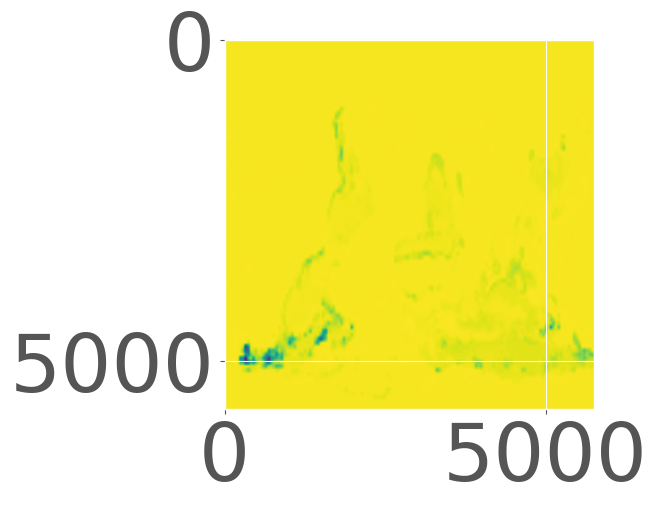

In [17]:
#mdata1(clm) - mdata(obs)
v1 = mdata - mdata1
v2 = data1 - data2

plt.imshow(v2)
plt.show()

In [18]:
fig = plt.figure(figsize=(48, 48)) 
m.drawmapboundary(fill_color='white', zorder=-1)
m.fillcontinents(color='0.8', lake_color='white', zorder=0) 
m.drawcoastlines(color='0.6', linewidth=0.5)
m.drawcountries(color='0.6', linewidth=0.5)
m.drawparallels(np.arange(-90.,91.,30.), labels=[1,0,0,1],    dashes=[1,1], linewidth=0.25, color='0.5',fontsize='large')
m.drawmeridians(np.arange(0., 360., 60.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize='large')

#mdata1(clm) - mdata(obs)
v2 = mdata - mdata1
v2_mean = np.mean(v2)
v2_std = np.std(v2)

#mdata1(clm) - mdata(obs)
#ocean masked
v1 = mdata - mdata1
# not ocean masked
v2 = data1 - data2

mdata3 = maskoceans(x2, y2, v2,resolution='h',grid=1.25,inlands=True)



vmin,vmax = (np.min(v2),np.max(v2))
vmin,vmax = (v2_mean-v2_std,v2_mean+v2_std)

vmin,vmax = (-0.66,0.66)

    
levels = np.linspace(vmin,vmax,26)   
cs = m.contourf(X2,Y2,mdata3,levels,vmin=vmin,vmax=vmax,cmap=plt.cm.bwr,extend='both')
   
plt.tight_layout()
cbar = m.colorbar(cs,location='bottom',pad='10%',ticks=np.linspace(vmin,vmax,7),format='%.2f')
cbar.ax.get_xaxis().labelpad = 60
cbar.ax.set_xlabel(r'Difference AM Kc (g.m$^{-3}$)', rotation=0,color='black', size=94)
cbar.solids.set_edgecolor("face")
#cbar.set_clim(vmin,vmax)
cbar.ax.tick_params(labelsize='xx-large')
plt.savefig('akc_diff.png',bbox_inches="tight",dpi=300)
count = count + 1
print('Saved Figure diff_v%s_v2.png!' % str(count)) 
plt.close("all")

Saved Figure diff_v3_v2.png!


ModeResult(mode=1.0000551713244544e-06, count=1)
ModeResult(mode=0.06, count=24)


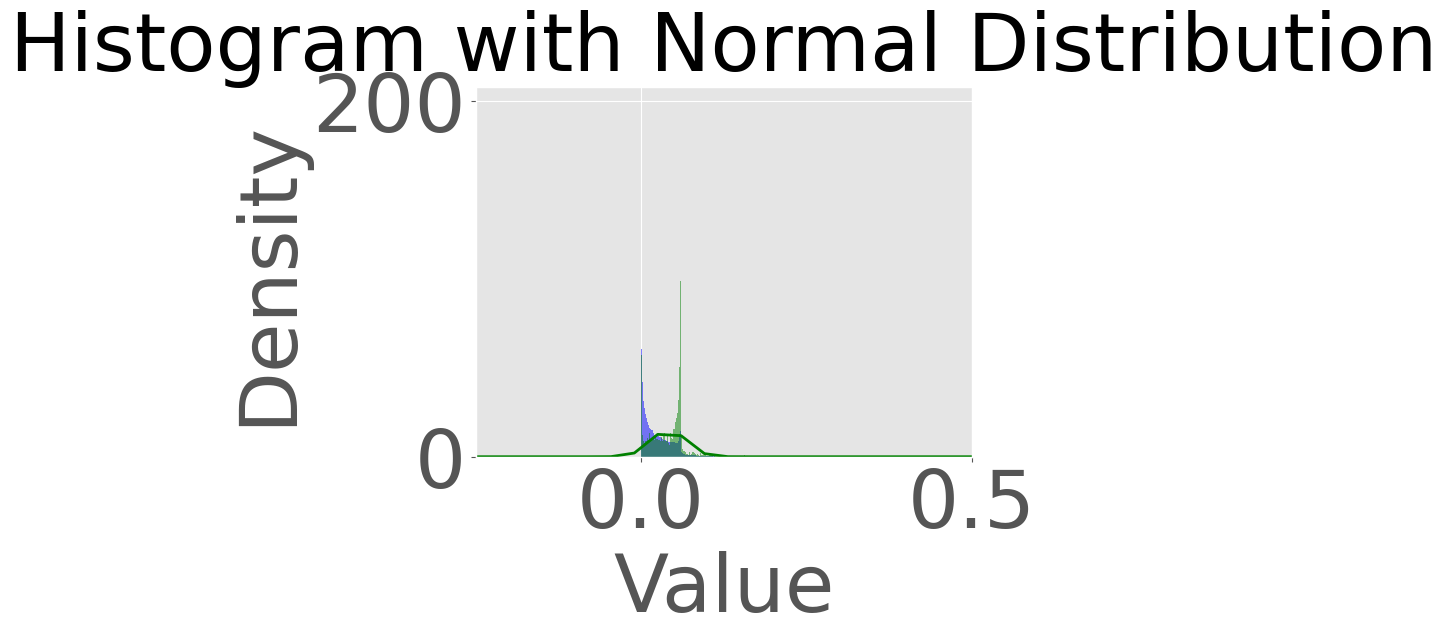

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data
data = v1.flatten()
data1 = v0.flatten()


data[data<1e-6]=np.nan
data1[data1<1e-6]=np.nan


# Plot histogram
plt.hist(data[~np.isnan(data)], bins=300, density=True, alpha=0.5, color='blue')
plt.hist(data1[~np.isnan(data1)], bins=300, density=True, alpha=0.5, color='green')

from scipy import stats
# compute the mode of the array
mode = stats.mode(data[~np.isnan(data)])
mode1 = stats.mode(data1[~np.isnan(data1)])

print(mode)
print(mode1)


plt.xlim([-1, 2.5])  # set x-limits

# Compute mean and standard deviation
mean, std = norm.fit(data[~np.isnan(data)])
mean1, std1 = norm.fit(data1[~np.isnan(data1)])


# Plot normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)

y1 = norm.pdf(x, mean1, std1)

#plt.plot(x, y, 'b', linewidth=2)
plt.plot(x, y1, 'g', linewidth=2)
#plt.ylim([-0.25, 25])  # set x-limits
plt.xlim([-0.25, 0.5])  # set x-limits



# Set plot title and axis labels
plt.title('Histogram with Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Show plot
plt.show()
